# Python勉強会(3・仮)<a id='top'></a>

###  目次
1. [単回帰分析](#sec1)

今回は、回帰分析を行います！いよいよ、勉強会も後半に突入です。

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols  # 回帰分析のパッケージ
from see import see  # 属性を調べるパッケージ

**単回帰分析**  <a id='sec1'></a>  
[先頭に戻る](#top)  

**単回帰分析**  
ある変数XとYが存在し、それら二つの変数に何らかの関係が存在することが仮定できるとき、もっとも簡単に$Y = \alpha + \beta X$と書けます。  このモデルは、Xが決定すると、Yも一意に定まるので、決定的モデルと言われます。  
これを現実の現象で考えてみましょう。  

例えば、鉄には熱によって膨張するという性質(熱膨張)が備わっています。  鉄道会社に勤めるAさんは、気温と熱の関係を調べるように要請されました。そこで、資料を確認すると、下の図と散布図が載っていました。

   heat  length
0    10    1001
1    15    1005
2    20    1007
3    25    1007
4    30    1012


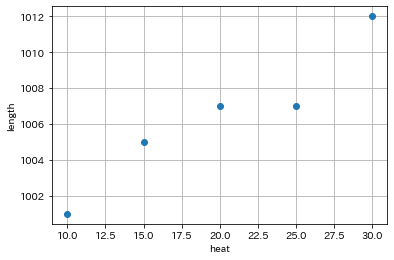

In [231]:
list = [[10,1001],[15,1005],[20,1007],[25,1007],[30,1012]]
df = pd.DataFrame(list)
df.columns=['heat', 'length']
print(df)
plt.plot(df['heat'],df['length'],"o")
plt.xlabel("heat")
plt.ylabel("length")
plt.grid(True)
pass

ある程度、一直線の関係が存在しているように思えます。そこで、Aさんは先ほどの式、$Y = \alpha + \beta X$を思い出し、当てはめてみようと考えました。しかし、Aさんは次のことに思い当たりました。  
「たしかに、この散布図は一直線のようにも見えるけど、正確には一直線ではないな。もしかしたら、測るときに誤差が生じているのかもしれない。」

この考えに基づき、先ほどの決定的モデルに"誤差$u$"を加えた式が、分析の際に一般に使われます。  
$Y = \alpha + \beta X + u$  
この式を、確率モデルといいます。

この式について、さらに見ていきます。  
$\alpha$が特定の値、$\acute{alpha}$を取るとき、$Y$は、$\acute{y}$をとります。  
$Y = \acute{\alpha} + \acute{\beta}X + \acute{u}$  
この式を変形すると、  
$\acute{u} = Y - \acute{\alpha} - \acute{\beta}X $    
この$\acute{u}$のことを残差と言います。  
そして、この残差の二乗した残差二乗和を最小化する$\alpha$,$\beta$を求める方法を**最小二乗法**と言います。

ここからは、ビールの消費量と気候の関係性について分析する。

平成30年度分 酒税課税関係等状況表:https://www.nta.go.jp/taxes/sake/tokei/kazeikankei2018/01.htm 

In [8]:
df0 = pd.read_csv("ビールExcel.csv")
df0.head()

,prefecture,beer
0,北海道,"113,097"
1,青森,"23,177"
2,岩手,"24,879"
3,宮城,"43,152"
4,秋田,"19,229"


In [9]:
df1 = pd.read_csv("seijin.csv",thousands=',')
df1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,都道府県名,性別,成人人数
1,北海道*,計,"4,509,363"
2,北海道*,男,"2,098,789"
3,北海道*,女,"2,410,574"
4,青森県*,計,"1,103,183"


In [10]:
df1 = pd.read_csv("seijin.csv",thousands=',')
df1 = df1.drop(index=0).reset_index(drop=True)
df1 = df1.rename(columns={'Unnamed: 0': 'prefecture',"Unnamed: 1":"性別" ,'Unnamed: 2': 'adult'})
df1 = df1[::3].reset_index(drop=True)
df1["prefecture"] = df1["prefecture"].str[:-2]
df1 = df1.replace({'茨':'茨城','北海':'北海道'})
df1 = df1.drop(index = [46],columns=['性別'])
df1.head()

,prefecture,adult
0,北海道,"4,509,363"
1,青森,"1,103,183"
2,岩手,"1,059,293"
3,宮城,"1,915,548"
4,秋田,"868,937"


In [11]:
df_pre_beer = pd.merge(df0,df1,how="inner")
df_pre_beer.head()

,prefecture,beer,adult
0,北海道,"113,097","4,509,363"
1,青森,"23,177","1,103,183"
2,岩手,"24,879","1,059,293"
3,宮城,"43,152","1,915,548"
4,秋田,"19,229","868,937"


In [12]:
print(df_pre_beer["beer"].dtype)
print(df_pre_beer["adult"].dtype)

object
object


In [13]:
df_pre_beer["beer"]=df_pre_beer["beer"].str.replace(',','')
df_pre_beer["adult"] = df_pre_beer["adult"].str.replace(',','')
df_pre_beer['beer'] = df_pre_beer['beer'].astype(int)
df_pre_beer['adult'] = df_pre_beer['adult'].astype(int)
df_pre_beer["thou"] = 1000
df_pre_beer["beer"] = df_pre_beer["beer"]*df_pre_beer["thou"]
df_pre_beer["per_beer"] = df_pre_beer["beer"] / df_pre_beer["adult"]
df_pre_beer.head()

,prefecture,beer,adult,thou,per_beer
0,北海道,113097000,4509363,1000,25.080483
1,青森,23177000,1103183,1000,21.009207
2,岩手,24879000,1059293,1000,23.486420
3,宮城,43152000,1915548,1000,22.527235
4,秋田,19229000,868937,1000,22.129337


In [18]:
df_new = df_pre_beer[["prefecture","per_beer"]]
df_new.head()

,prefecture,per_beer
0,北海道,25.080483
1,青森,21.009207
2,岩手,23.486420
3,宮城,22.527235
4,秋田,22.129337


In [19]:
#グラフの名前を日本語で表示するライブラリ
!pip install japanize-matplotlib
import japanize_matplotlib

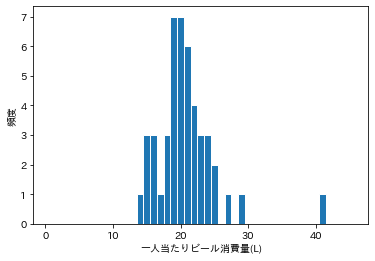

In [20]:
plt.hist(df_new["per_beer"],bins = np.arange(46)+0.5,ec ="w")
plt.xlabel("一人当たりビール消費量(L)")
plt.ylabel("頻度")
plt.show()
pass

In [21]:
df_tmp = pd.read_csv("年平均気温.csv")
df_tmp["prefecture"] = df_tmp["prefecture"].str[:-1]
df_tmp = df_tmp.replace({'北海':'北海道'})
df_tmp.drop(index = [46])
df_tmp.head()

,prefecture,ave_temp
0,北海道,9.5
1,青森,11.0
2,岩手,11.0
3,宮城,13.6
4,秋田,12.3


In [22]:
df_ok = pd.merge(df_new,df_tmp,how="inner")
df_ok

,prefecture,per_beer,ave_temp
0,北海道,25.080483,9.5
1,青森,21.009207,11.0
2,岩手,23.486420,11.0
3,宮城,22.527235,13.6
4,秋田,22.129337,12.3
5,山形,21.397989,12.6
6,福島,21.432113,14.2
7,茨城,17.562926,15.3
8,栃木,18.717050,15.2
9,群馬,18.032882,16.1


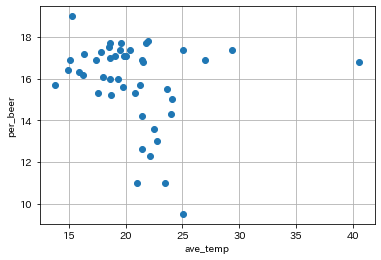

In [23]:
#散布図を描くための下準備
%matplotlib inline
import matplotlib.pyplot as plt

#図に使う変数の設定
plt.plot(df_ok['per_beer'],df_ok['ave_temp'],"o")

#軸の名前を設定
plt.xlabel("ave_temp")
plt.ylabel("per_beer")

#メモリを入れる
plt.grid(True)
pass

In [24]:
y = df_ok['per_beer']
x = df_ok['ave_temp']
np.corrcoef(y,x)

array([[ 1.        , -0.19479056],
       [-0.19479056,  1.        ]])

**回帰分析**

In [25]:
formula = 'y ~ x'
mod = ols(formula, data=df_ok)
res = ols(formula, data=df_ok).fit()
res.params

Intercept    27.378108
x            -0.422595
dtype: float64

In [26]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.735
Date:                Tue, 23 Feb 2021   Prob (F-statistic):              0.195
Time:                        18:48:18   Log-Likelihood:                -132.09
No. Observations:                  46   AIC:                             268.2
Df Residuals:                      44   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.3781      5.131      5.336      0.0

In [27]:
print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.3781      5.131      5.336      0.000      17.038      37.719
x             -0.4226      0.321     -1.317      0.195      -1.069       0.224
